# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [1]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.portfolio.tracker import Tracker

import pandas as pd

In [2]:
c=Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")

In [3]:
p=Portfolio("coinbase",configuration=c)

Warning! There are 5 transactionsthat were EXCLUDED in std_df.
Coinbase errors:
TransactionsHistory(Transactions:186 - Processed:186, Unhandled:0 - Errors:9)


In [4]:
p.std_df.head(10)

,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:29:22Z,buy,0.017237,BTC,100.00,EUR,100.00,97.01,2.99,5627.999719,None
2018-10-22T06:29:22Z,buy,100.000000,EUR,100.00,EUR,NaN,NaN,NaN,1.000000,None
2018-11-09T12:05:12Z,sell,0.017237,BTC,93.27,EUR,93.27,96.26,2.99,5584.488743,None
2018-11-09T12:05:13Z,sell,93.270000,EUR,93.27,EUR,NaN,NaN,NaN,1.000000,None
2018-11-09T12:06:14Z,buy,348.021666,BAT,93.27,EUR,93.27,90.28,2.99,0.259409,None
2018-11-09T12:06:15Z,buy,93.270000,EUR,93.27,EUR,NaN,NaN,NaN,1.000000,None
2019-01-25T14:28:56Z,sell,35.960000,EUR,35.96,EUR,NaN,NaN,NaN,1.000000,None
2019-01-25T14:28:56Z,sell,348.021666,BAT,35.96,EUR,35.96,37.95,1.99,0.109045,None
2021-04-20T18:57:40Z,buy,0.258429,ETH,500.00,EUR,500.00,492.66,7.34,1906.364408,None


In [5]:
p.std_df.total_fee.sum()

234.18000000000026

## Portfolio total investment`
Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [6]:
p.coinbase.history.df[p.coinbase.history.df.type.isin(["fiat_deposit","fiat_withdrawal"])].groupby("type")[["amount"]].sum()

,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio live value tracker

In [7]:
t=Tracker(p.std_df,stocks_start="20-4-2021",configuration=c)

In [8]:
t.stocks_start

Timestamp('2021-04-20 00:00:00+0000', tz='UTC')

In [9]:
t.portfolio_df.head()

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
0,2018-10-22 06:29:22+00:00,buy,0.017237,BTC,100.00,5627.999719
2,2018-11-09 12:05:12+00:00,sell,0.017237,BTC,93.27,5584.488743
4,2018-11-09 12:06:14+00:00,buy,348.021666,BAT,93.27,0.259409
7,2019-01-25 14:28:56+00:00,sell,348.021666,BAT,35.96,0.109045
8,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408


### Load closedata log

Error log from loading data.

In [10]:
t.error_log

[]

### Set benchmark

Set coin as benchmark.

In [11]:
benchmark=t.set_benchmark("ETH")
benchmark

,Date,Close
0,2021-04-20 00:00:00+00:00,1936.596366
1,2021-04-21 00:00:00+00:00,1964.593249
2,2021-04-22 00:00:00+00:00,2000.536891
3,2021-04-23 00:00:00+00:00,1953.619811
4,2021-04-24 00:00:00+00:00,1828.220570
...,...,...
322,2022-03-08 00:00:00+00:00,2364.462260
323,2022-03-09 00:00:00+00:00,2465.147372
324,2022-03-10 00:00:00+00:00,2368.094996
325,2022-03-11 00:00:00+00:00,2345.209878


#### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [12]:
t.active_positions.head()

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
8,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408
10,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854
13,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921
14,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980
16,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730


#### Daily snapshots

The module produces daily snapshots of the portfolio balance.

In [13]:
t.daily_snapshots[-1]

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot
160,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,2022-03-12 00:00:00+00:00
162,2021-09-07 10:00:18+00:00,buy,72.073991,ADA,389.49,2.166873,2022-03-12 00:00:00+00:00
164,2021-09-09 23:30:55+00:00,buy,323.271703,ADA,692.45,2.142006,2022-03-12 00:00:00+00:00
156,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-12 00:00:00+00:00
166,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-12 00:00:00+00:00
170,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-12 00:00:00+00:00
172,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-03-12 00:00:00+00:00


### Portfolio calculations

In [38]:
value=t.track_value()
value

,Value
Date Snapshot,
2021-04-20 00:00:00+00:00,500.472817
2021-04-21 00:00:00+00:00,507.708026
2021-04-22 00:00:00+00:00,516.996908
2021-04-23 00:00:00+00:00,504.872170
2021-04-24 00:00:00+00:00,663.967701
...,...
2022-03-08 00:00:00+00:00,908.786690
2022-03-09 00:00:00+00:00,941.186282
2022-03-10 00:00:00+00:00,897.399906


In [40]:
p.coinbase.history.df[
    p.coinbase.history.df.type.isin(["fiat_deposit","fiat_withdrawal"])
    ]#.groupby("type")[["amount"]].sum()

,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:07:05Z,fiat_deposit,100.00,EUR,100.00,EUR,100.00,100.00,0.00,1.0,None
2019-01-25T14:29:16Z,fiat_withdrawal,-35.96,EUR,-35.96,EUR,35.81,35.96,0.15,1.0,None
2021-04-20T05:49:17Z,fiat_deposit,500.00,EUR,500.00,EUR,500.00,500.00,0.00,1.0,None
2021-04-22T05:41:40Z,fiat_deposit,250.00,EUR,250.00,EUR,250.00,250.00,0.00,1.0,None
2021-04-27T05:47:02Z,fiat_deposit,200.00,EUR,200.00,EUR,200.00,200.00,0.00,1.0,None


(<Figure size 900x244.8 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd5d280f10>,
       dtype=object))

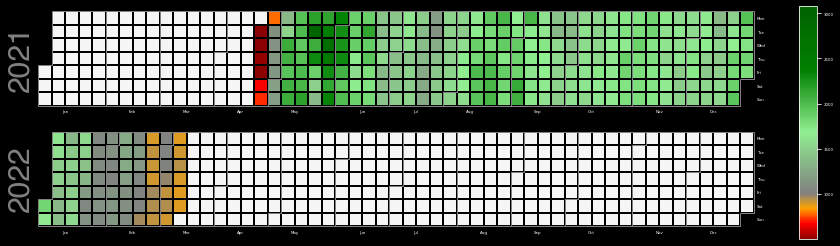

In [31]:
import calplot
from surfingcrypto.reporting.plotting import shiftedColorMap
import matplotlib.cm as cm
from matplotlib.colors import Normalize,LinearSegmentedColormap
norm=Normalize(vmin=value["Value"].min(), vmax=value["Value"].max())
cmap=shiftedColorMap(
    LinearSegmentedColormap.from_list(
            "colorbar", [ "darkred","red", "orange","grey","lightgreen","green","darkgreen"]
        ),
    midpoint=norm(p.coinbase.history.df[
    p.coinbase.history.df.type.isin(["fiat_deposit","fiat_withdrawal"])
    ].groupby("type")[["amount"]].sum().reset_index()["amount"].sum()
    ))
calplot.calplot(value["Value"],cmap=cmap)

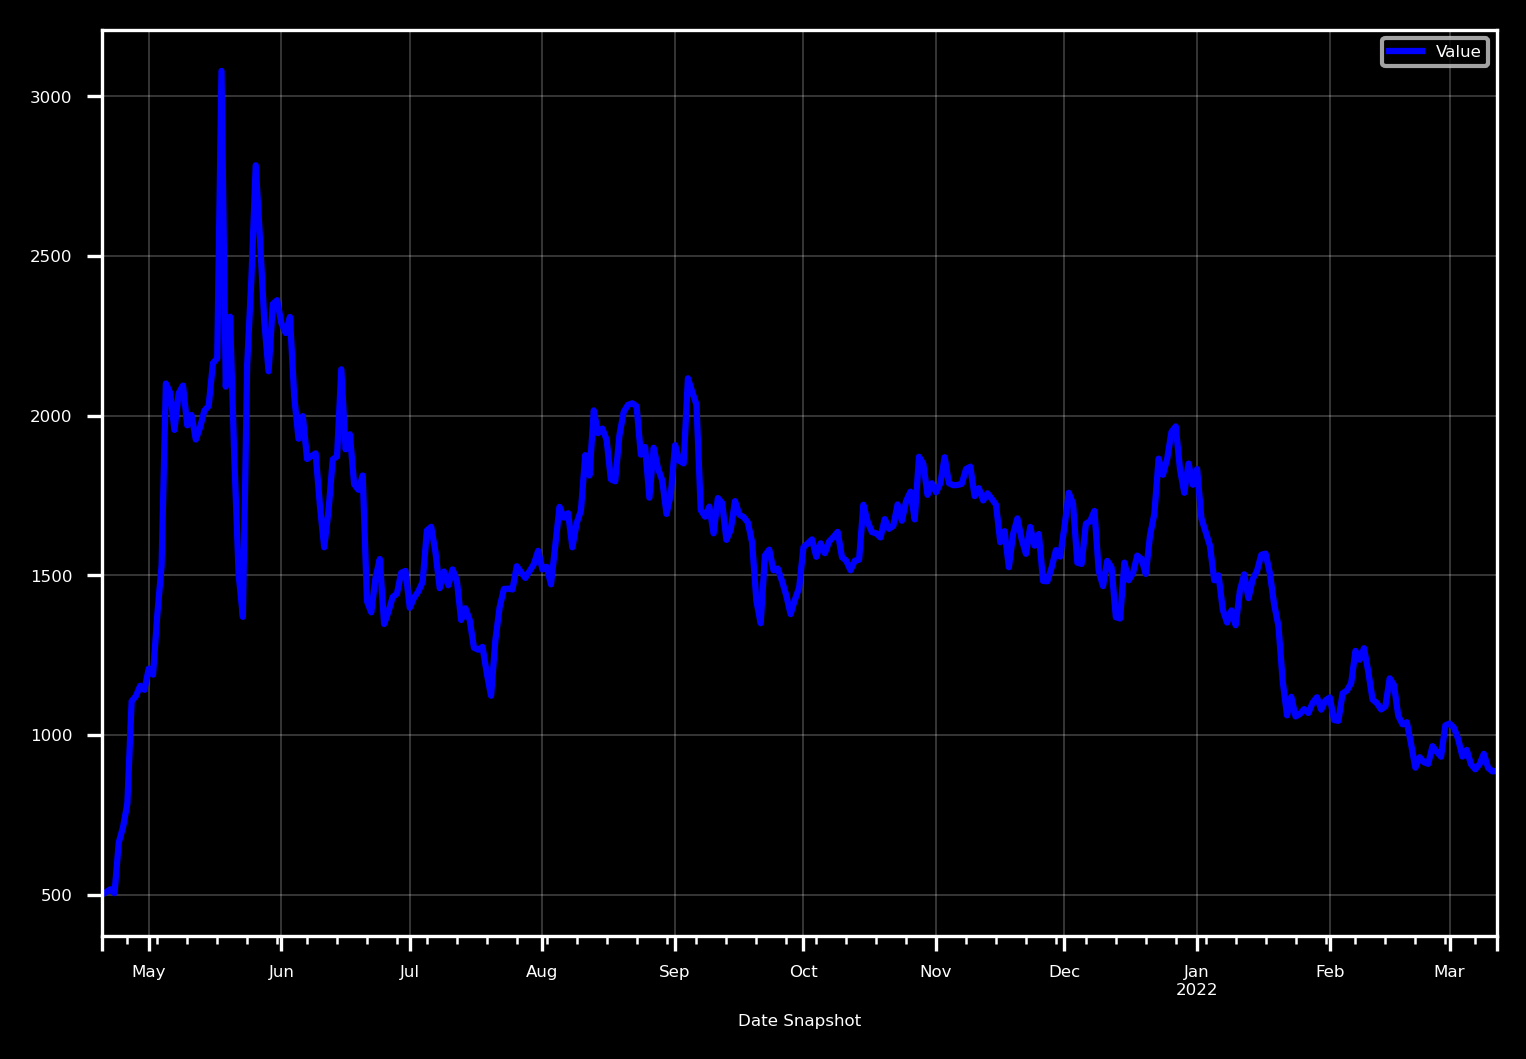

In [34]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(dpi=300)
value.plot(ax=ax,color="blue")
ax.grid(linewidth=0.1)

In [18]:
combined_df=t.per_day_portfolio_calcs(
    benchmark,
)
combined_df

,Adj cost,Adj cost per share,Date Snapshot,Open date,Qty,Symbol,Type,index_x,Symbol Adj Close,Adj cost daily,...,Benchmark Start Date Cost,Benchmark Return,symbol Return,symbol Share Value,Benchmark Share Value,Stock Gain / (Loss),Benchmark Gain / (Loss),Abs Value Compare,Abs Value Return,Abs. Return Compare
0,492.66,1906.364408,2021-04-20 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,0,1936.596366,500.472817,...,492.66,0.000000,0.015858,500.472817,492.660000,7.812817,5.684342e-14,7.812817,0.015858,0.015858
1,492.66,1906.364408,2021-04-21 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,1,1964.593249,507.708026,...,492.66,0.014457,0.030544,507.708026,499.782261,15.048026,7.122261e+00,15.048026,0.030544,0.016088
2,492.66,1906.364408,2021-04-22 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,2,2000.536891,516.996908,...,492.66,0.033017,0.049399,516.996908,508.926136,24.336908,1.626614e+01,24.336908,0.049399,0.016382
3,492.66,1906.364408,2021-04-23 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,3,1953.619811,504.872170,...,492.66,0.008790,0.024788,504.872170,496.990675,12.212170,4.330675e+00,12.212170,0.024788,0.015998
4,492.66,1906.364408,2021-04-24 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,4,1828.220570,472.465360,...,492.66,-0.055962,-0.040991,472.465360,465.089763,-20.194640,-2.757024e+01,-20.194640,-0.040991,0.014971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,186.85,182.087335,2021-12-28 00:00:00+00:00,2021-11-29 10:47:17+00:00,1.026156,SOL,buy,252,156.830589,160.932640,...,186.85,0.734846,-0.138707,160.932640,324.156010,-25.917360,1.373060e+02,-25.917360,-0.138707,-0.873553
860,186.85,182.087335,2021-12-29 00:00:00+00:00,2021-11-29 10:47:17+00:00,1.026156,SOL,buy,253,150.229338,154.158727,...,186.85,0.649381,-0.174960,154.158727,308.186868,-32.691273,1.213369e+02,-32.691273,-0.174960,-0.824341
861,186.85,182.087335,2021-12-30 00:00:00+00:00,2021-11-29 10:47:17+00:00,1.026156,SOL,buy,254,152.570917,156.561552,...,186.85,0.693699,-0.162100,156.561552,316.467636,-30.288448,1.296176e+02,-30.288448,-0.162100,-0.855799
862,186.85,182.087335,2021-12-31 00:00:00+00:00,2021-11-29 10:47:17+00:00,1.026156,SOL,buy,255,149.727281,153.643538,...,186.85,0.671891,-0.177717,153.643538,312.392851,-33.206462,1.255429e+02,-33.206462,-0.177717,-0.849608


In [19]:
t.line(combined_df, ["Stock Gain / (Loss)"])
t.line(combined_df, ["Stock Gain / (Loss)","Benchmark Gain / (Loss)"])
t.line_facets(combined_df, 'symbol Return', 'Benchmark Return')